# Task 2: To Explore Supervised Machine Learning
 * By Naveen Kamal P V

# Simple Linear Regression
* In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
* This is a simple linear regression task as it involves just two variables.



In [22]:
#Import all Libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [23]:
# Read dataset

link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print("Data is imported successfully")

Data is imported successfully


In [24]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [25]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


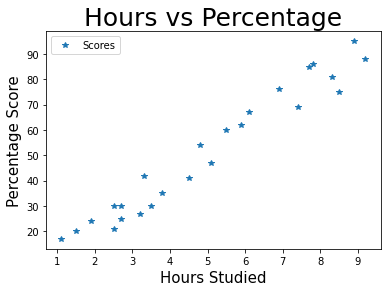

In [26]:
# Now we will Plotting the Distribution of scores

data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage', fontsize=25)  
plt.xlabel('Hours Studied', fontsize=15)  
plt.ylabel('Percentage Score', fontsize=15)  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score


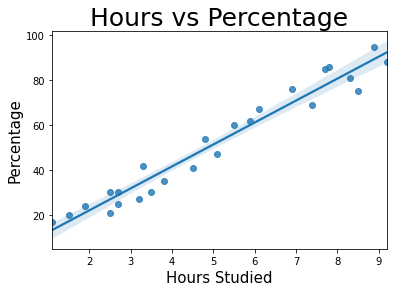

In [27]:
sns.regplot(x='Hours',y='Scores',data=data)
plt.title("Hours vs Percentage", fontsize=25)
plt.xlabel("Hours Studied", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.show()

### Analysing the correlation between the variables
* Correlation analysis is a statistical method used to evaluate the strength of relationship between two quantitative variables. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related.

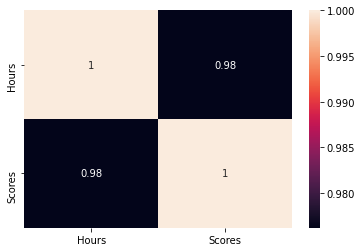

In [28]:
sns.heatmap(data.corr(), annot=True)

## Preparing the data
* The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).



In [29]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values


In [30]:
display(X,y)

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [31]:
# split this data into training

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
y_test.shape

(5,)

In [33]:
X_test.shape

(5, 1)

In [34]:
y_train.shape

(20,)

In [35]:
y_train.shape

(20,)

## Training the Algorithm
* We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [36]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression().fit(X_train, y_train)  
n = regressor.coef_
c = regressor.intercept_
print("Training complete.")

Training complete.


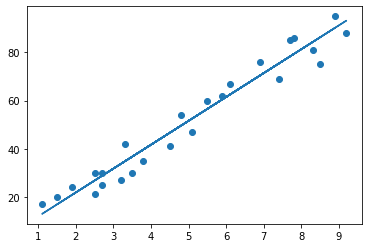

In [37]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [38]:
# Making Predictions

print(X_test)                                 # Testing data - In Hours
y_pred = regressor.predict(X_test)            # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [39]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [40]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [41]:
# You can also test with your own data

hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


In [42]:
# evaluate the performance of algorithm

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
